In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import importlib

import interpolation_runner as ip
import file_handler as fh

In [12]:
#--SETUP: ---------------------------------------------------------------------------------
epsilons = np.linspace(-2000, 2000, 10)
lamdas = np.linspace(0,1,12)
T_L = 10
T_R = 1

if T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L

INPUT = {
    'omega': 0.09,
    'u_intra': 1000,
    'u_inter': 200,
    'V_B': 80,
    'gammaL': 0.1,
    'gammaR': 0.105,
    'T_L': T_L,
    'T_R': T_R,
}
       


In [27]:
importlib.reload(ip)
I, I_var, J_QH, P, eff, sigma, TUR = ip.run_interpolation(epsilons, lamdas, **INPUT)

In [28]:
importlib.reload(fh)
fh.save_file(I, I_var, J_QH, P, eff, sigma, TUR, epsilons, lamdas, INPUT)


Existing one: (480, 17)
combined one one: (600, 17)
After dropping duplicates: (480, 17)


In [15]:
'''
# Read the CSV file into a DataFrame
df = pd.read_csv('results.csv')

# Find the minimum TUR value
min_tur_value = df['TUR'].min()

# Filter the DataFrame for all rows with the lowest TUR value
min_tur_rows = df[df['TUR'] == min_tur_value]

print(min_tur_rows)
'''

# Read the CSV file into a DataFrame
df = pd.read_csv('results.csv')
# Get the 10 lowest TUR values
#lowest_tur_rows = df.nsmallest(20, 'TUR')

#print(lowest_tur_rows)
print(df.nsmallest(20, 'TUR'))


         epsilon    lambda          TUR         I     I_var      J_QH  \
480 -2000.000000  0.818182 -3830.946309  0.000000 -0.000000  0.000000   
116    33.333333  1.000000     3.292137  0.000521  0.000584  0.030650   
236    33.333333  1.000000     3.292144  0.000534  0.000598  0.031400   
226    33.333333  0.909091     3.298091  0.000483  0.000540  0.028409   
106    33.333333  0.909091     3.298879  0.000471  0.000527  0.027728   
126    33.333333  0.000000     3.299658  0.000011  0.000013  0.000657   
216    33.333333  0.818182     3.304920  0.000428  0.000478  0.025167   
96     33.333333  0.818182     3.306567  0.000417  0.000467  0.024563   
6      33.333333  0.000000     3.308052  0.000011  0.000012  0.000641   
206    33.333333  0.727273     3.313570  0.000369  0.000412  0.021703   
86     33.333333  0.727273     3.316128  0.000360  0.000402  0.021182   
196    33.333333  0.636364     3.325379  0.000307  0.000343  0.018072   
76     33.333333  0.636364     3.328872  0.000300  

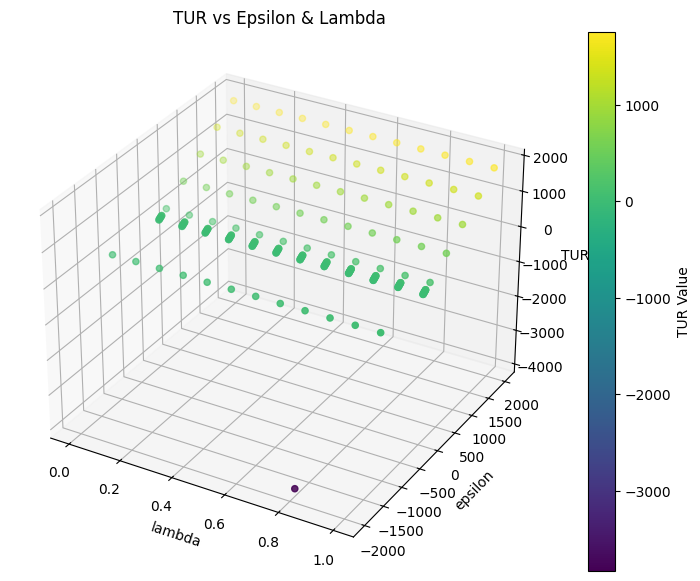

In [16]:
#Plotting from dataframe

# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(df['lambda'], df['epsilon'], df['TUR'], c=df['TUR'], cmap='viridis')

# Labels
ax.set_xlabel('lambda')
ax.set_ylabel('epsilon')
ax.set_zlabel('TUR')

# Add color bar
plt.colorbar(sc, label="TUR Value")

plt.title("TUR vs Epsilon & Lambda")
plt.show()

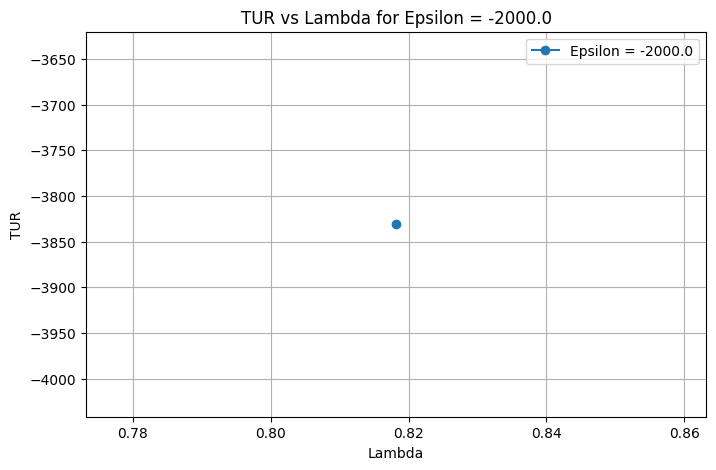

In [17]:
#mera plotting
# Remove rows where TUR is NaN
df_clean = df.dropna(subset=['TUR'])

# Find the lowest epsilon where TUR is not NaN
min_epsilon_with_tur = df_clean['epsilon'].min()

# Filter the DataFrame for this lowest epsilon
df_filtered = df_clean[df_clean['epsilon'] == min_epsilon_with_tur]

# Plot TUR vs lambda for the lowest epsilon with TUR values
plt.figure(figsize=(8, 5))
plt.plot(df_filtered['lambda'], df_filtered['TUR'], marker='o', linestyle='-', label=f"Epsilon = {min_epsilon_with_tur}")

# Labels and title
plt.xlabel("Lambda")
plt.ylabel("TUR")
plt.title(f"TUR vs Lambda for Epsilon = {min_epsilon_with_tur}")
plt.legend()
plt.grid()

# Show plot
plt.show()

In [18]:
# Filtrera ut bara raderna som hör till en viss parameteruppsättning

df_total = pd.read_csv('results.csv')
# Get the 5 lowest TUR values
lowest_turs = df_total.nsmallest(5, 'TUR')

# Filtrera ut bara raderna som hör till en viss parameteruppsättning
filter_conditions = True
for param, value in INPUT.items():
    filter_conditions &= (df[param] == value)

# Filter the DataFrame using the generated conditions
filtered_df = df[filter_conditions]

print(lowest_turs)
print("~~~~~|     |     |   |      |   ~~~~~")
print((filtered_df.nsmallest(10, 'TUR')))

         epsilon    lambda          TUR         I     I_var      J_QH  \
480 -2000.000000  0.818182 -3830.946309  0.000000 -0.000000  0.000000   
116    33.333333  1.000000     3.292137  0.000521  0.000584  0.030650   
236    33.333333  1.000000     3.292144  0.000534  0.000598  0.031400   
226    33.333333  0.909091     3.298091  0.000483  0.000540  0.028409   
106    33.333333  0.909091     3.298879  0.000471  0.000527  0.027728   

            P       eff     sigma  omega  u_intra  u_inter  V_B  gammaL  \
480  0.000000  0.079817  0.000000  0.090     1000      200   80     0.1   
116  0.026053  0.850032  0.001532  0.105      500      300   50     0.1   
236  0.026691  0.850032  0.001569  0.105      500      300   50     0.1   
226  0.024145  0.849910  0.001423  0.105      500      300   50     0.1   
106  0.023566  0.849893  0.001389  0.105      500      300   50     0.1   

     gammaR  T_L  T_R  
480   0.105   10    1  
116   0.100   10    1  
236   0.105   10    1  
226   0.105   

In [26]:
#Remove any entry with negative TUR from results.csv

filename = 'results.csv'
dfRem = pd.read_csv(filename)
print('shape of results.csv:',dfRem.shape)
dfRem = dfRem[dfRem['TUR'].isna() | (dfRem['TUR'] >= 0)]
dfRem.to_csv(filename, index=False)
print('after removing negative TURs:',dfRem.shape)

print((dfRem.nsmallest(10, 'TUR')))

shape of results.csv: (481, 17)
after removing negative TURs: (480, 17)
       epsilon    lambda       TUR         I     I_var      J_QH         P  \
116  33.333333  1.000000  3.292137  0.000521  0.000584  0.030650  0.026053   
236  33.333333  1.000000  3.292144  0.000534  0.000598  0.031400  0.026691   
226  33.333333  0.909091  3.298091  0.000483  0.000540  0.028409  0.024145   
106  33.333333  0.909091  3.298879  0.000471  0.000527  0.027728  0.023566   
126  33.333333  0.000000  3.299658  0.000011  0.000013  0.000657  0.000558   
216  33.333333  0.818182  3.304920  0.000428  0.000478  0.025167  0.021386   
96   33.333333  0.818182  3.306567  0.000417  0.000467  0.024563  0.020873   
6    33.333333  0.000000  3.308052  0.000011  0.000012  0.000641  0.000545   
206  33.333333  0.727273  3.313570  0.000369  0.000412  0.021703  0.018439   
86   33.333333  0.727273  3.316128  0.000360  0.000402  0.021182  0.017996   

          eff     sigma  omega  u_intra  u_inter  V_B  gammaL  gammaR

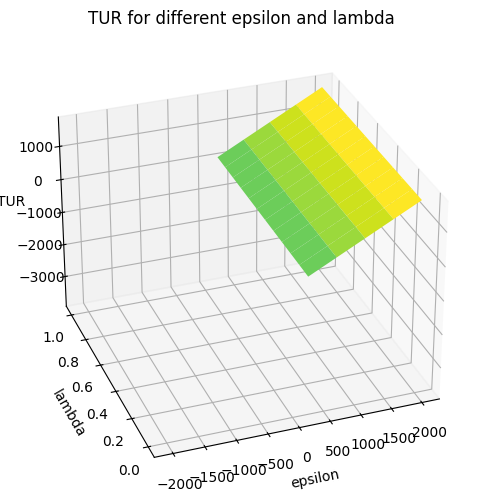

In [20]:
#3D - plot

Epsilon, Lamda = np.meshgrid(epsilons, lamdas)    # Create a 2D grid

# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Epsilon, Lamda, TUR, cmap='viridis')

# Labels
ax.set_xlabel('epsilon')
ax.set_ylabel('lambda')
ax.set_zlabel('TUR')
ax.set_title('TUR for different epsilon and lambda')
#ax.set_xlim(160, 200)
#ax.set_zlim(0, 200)
#ax.view_init(elev=-90, azim=120)
ax.view_init(azim=-110)

plt.show()

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=TUR, x=Epsilon, y=Lamda, colorscale="viridis")])

# Labels
fig.update_layout(
    title="TUR for different epsilon and lambda",
    scene=dict(
        xaxis_title="epsilon",
        yaxis_title="lambda",
        zaxis_title="TUR"
        #xaxis=dict(title="epsilon", range=[160, 200]),  # X-axis limits
        #yaxis=dict(title="lambda", range=[0, 1]),  # Y-axis limits
        #zaxis=dict(title="T", range=[0, 200])  # Z-axis remains auto-scaled
    )
)

# Show the interactive plot
fig.show()



J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


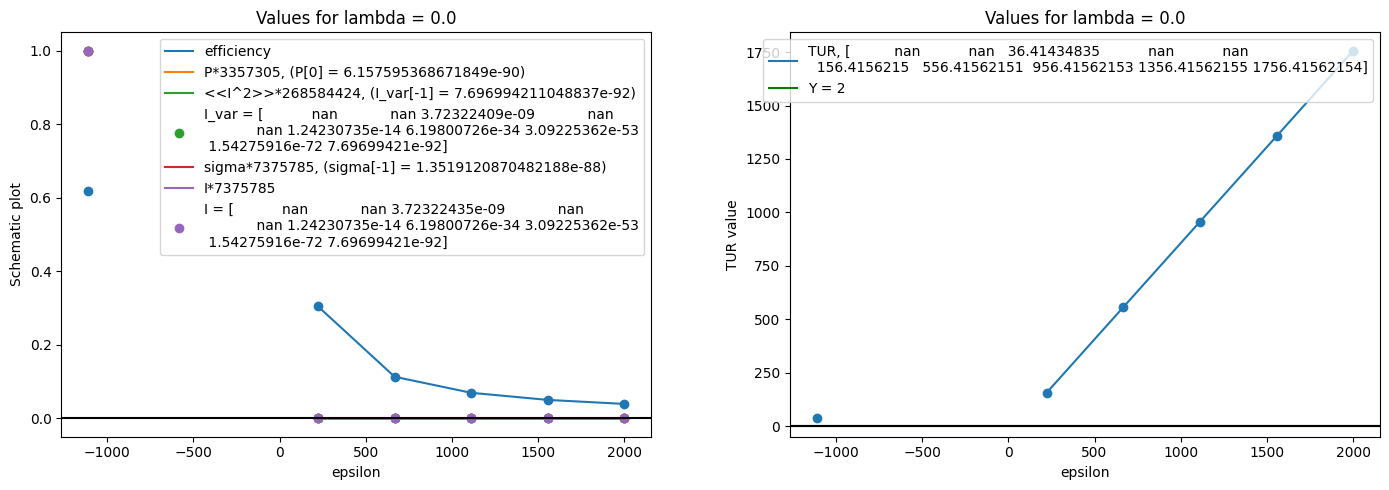

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


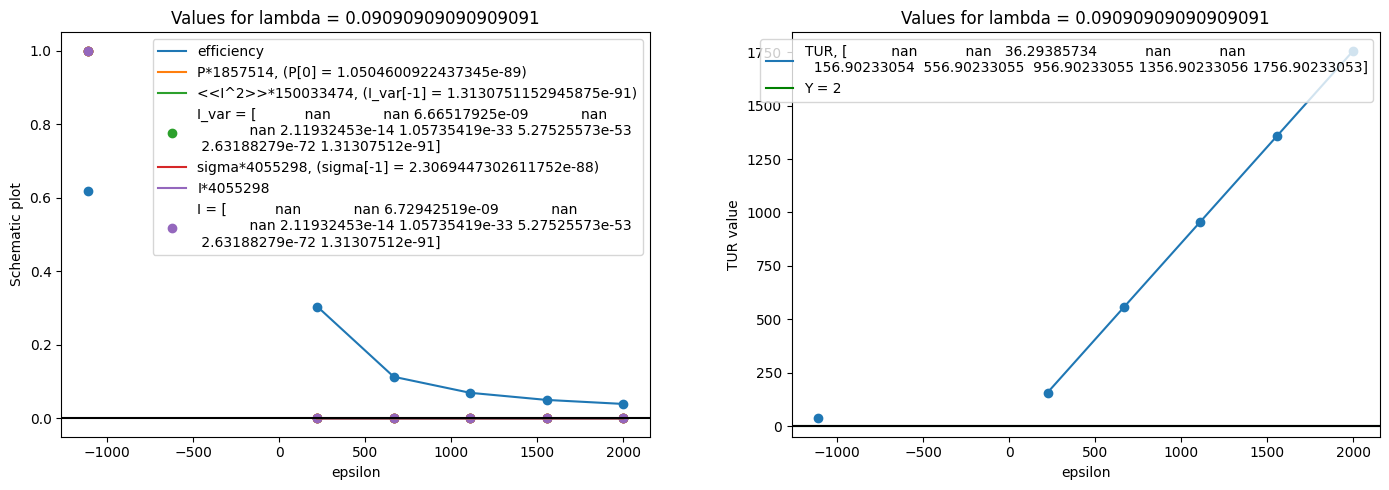

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


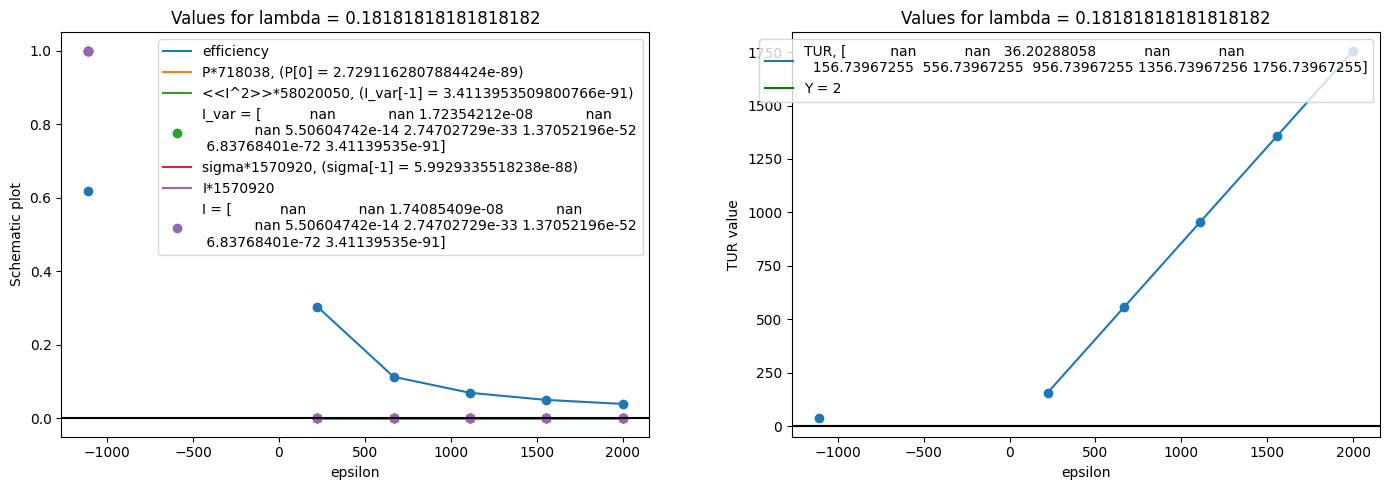

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


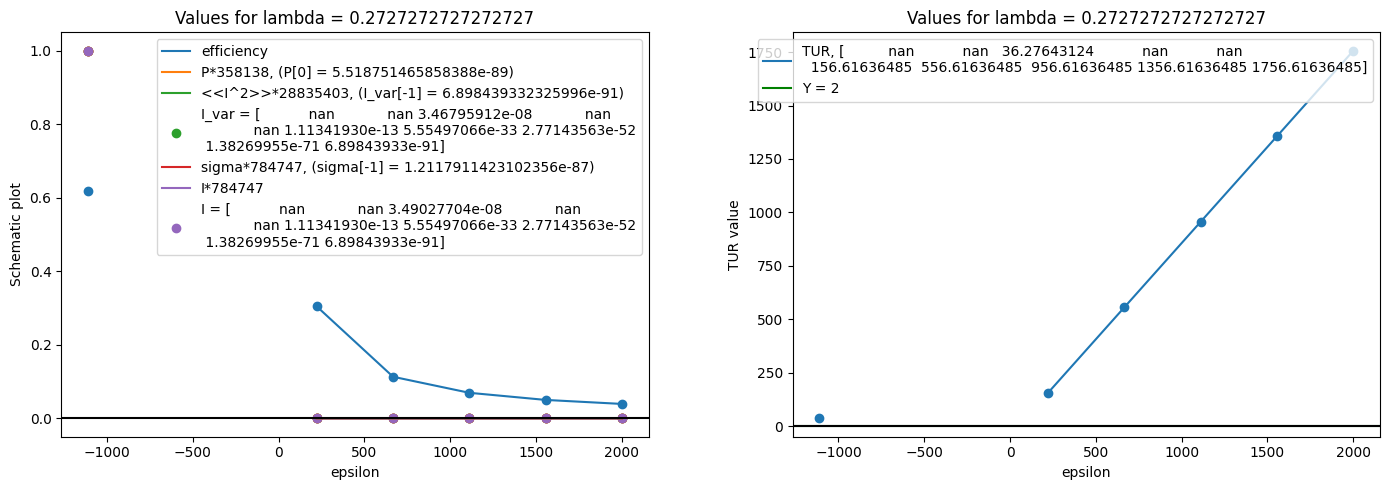

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


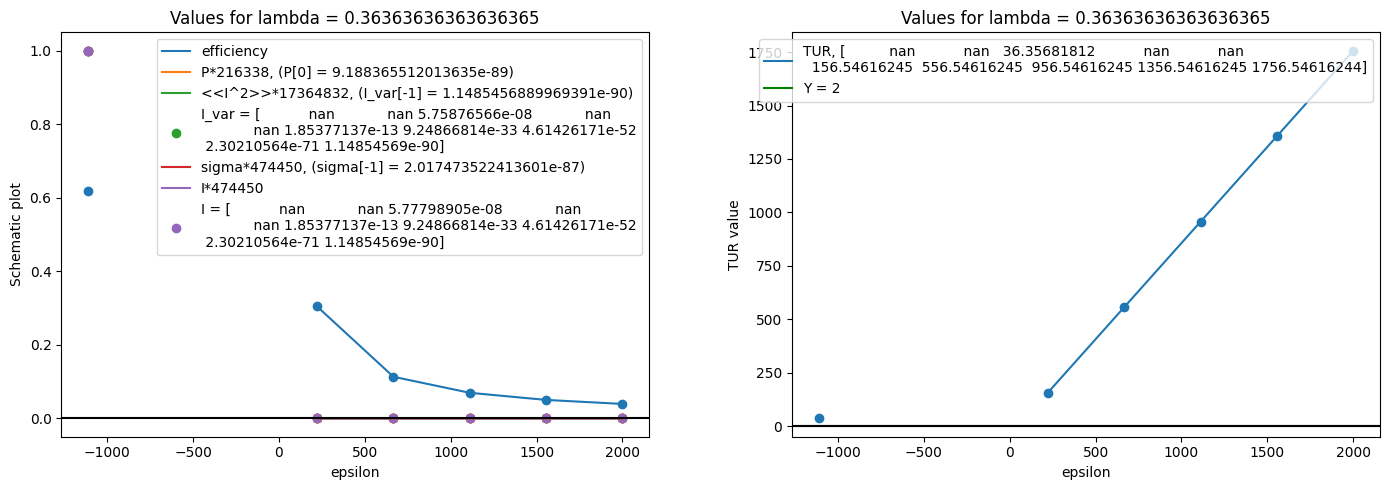

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


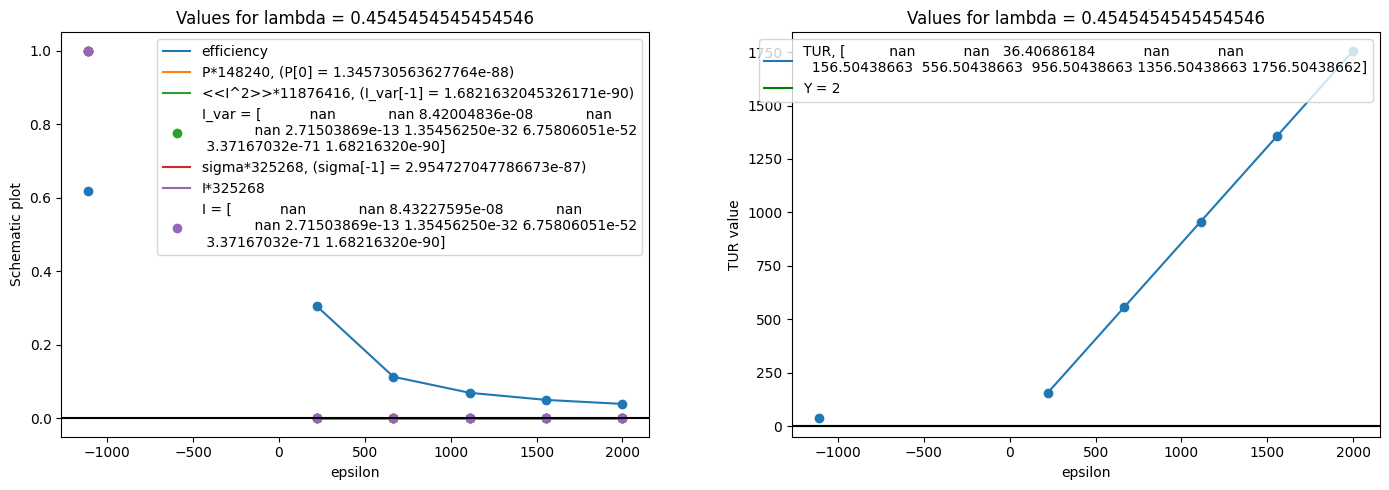

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


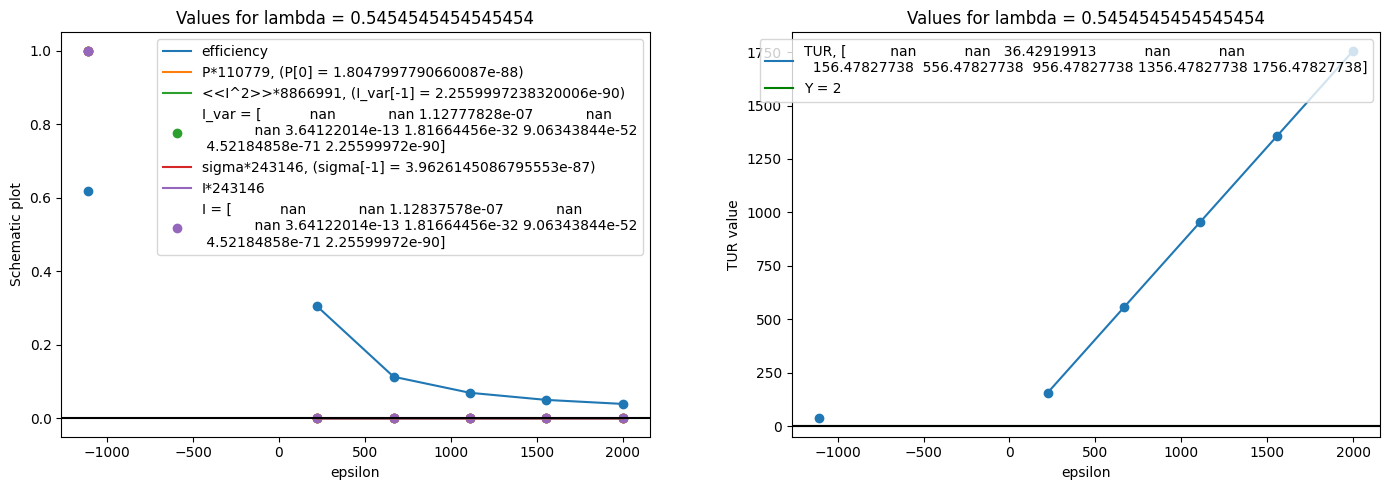

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


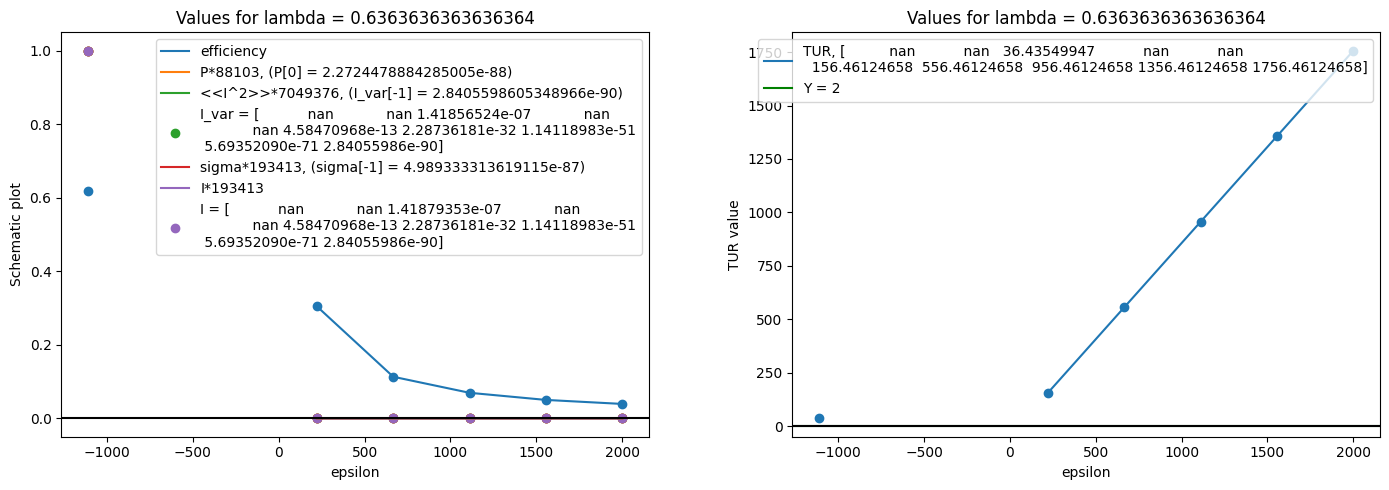

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


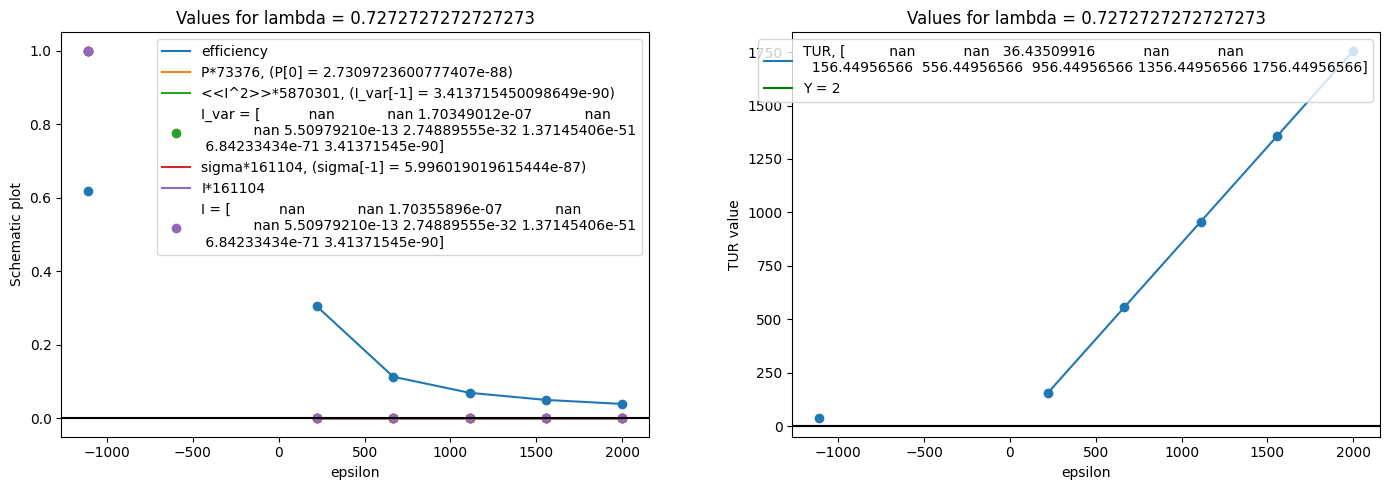

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


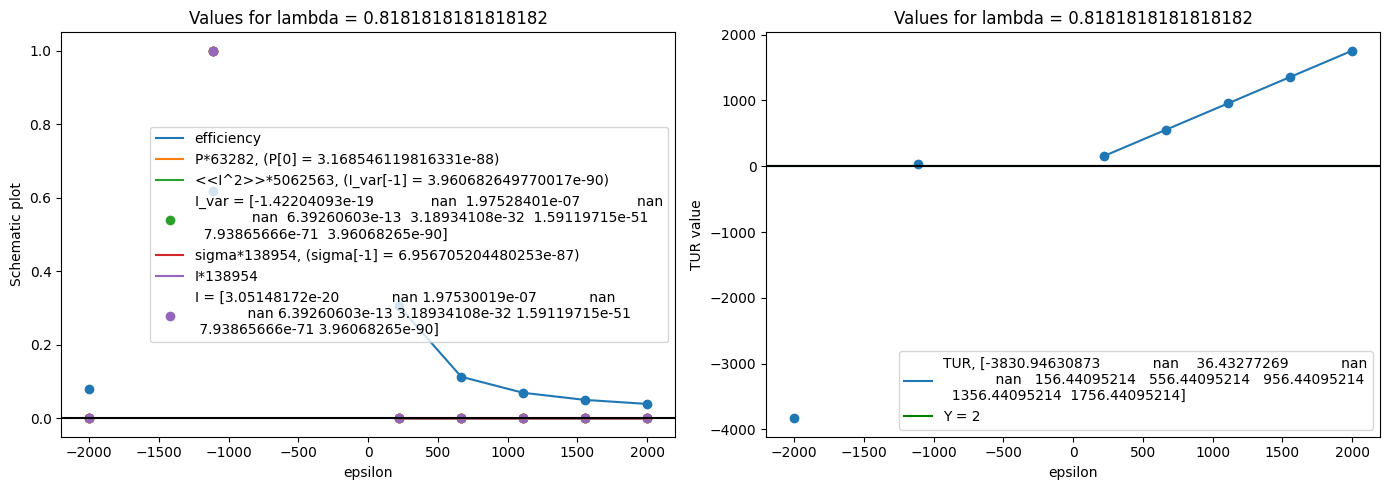

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


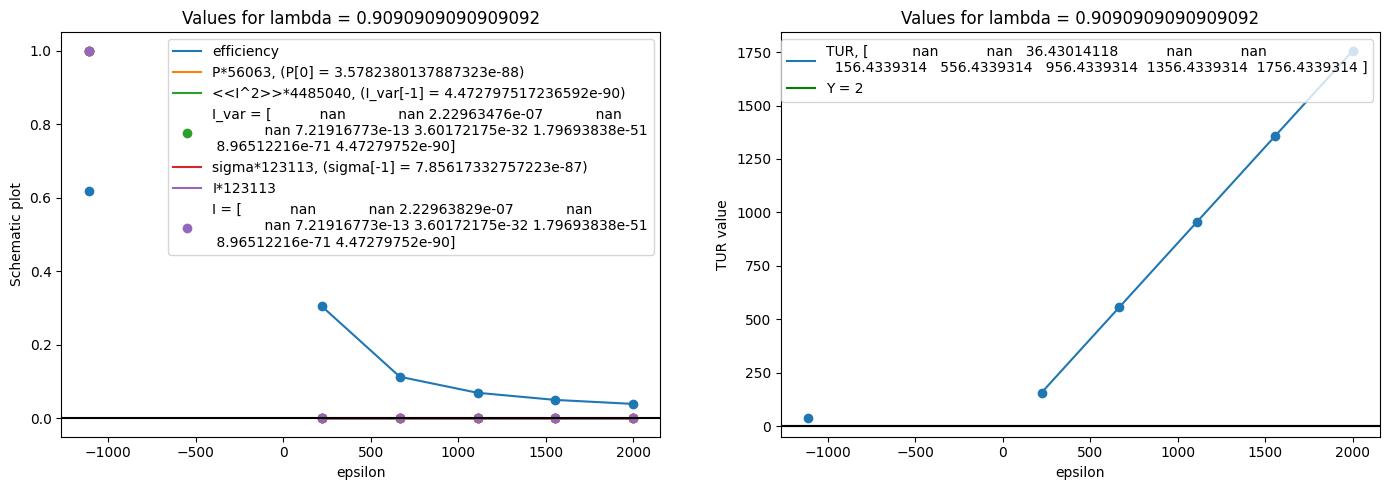

J_QH[0]: [           nan            nan 4.81596385e-07            nan
            nan 3.26334293e-12 4.38278738e-31 3.56095551e-50
 2.46227040e-69 1.57054227e-88]


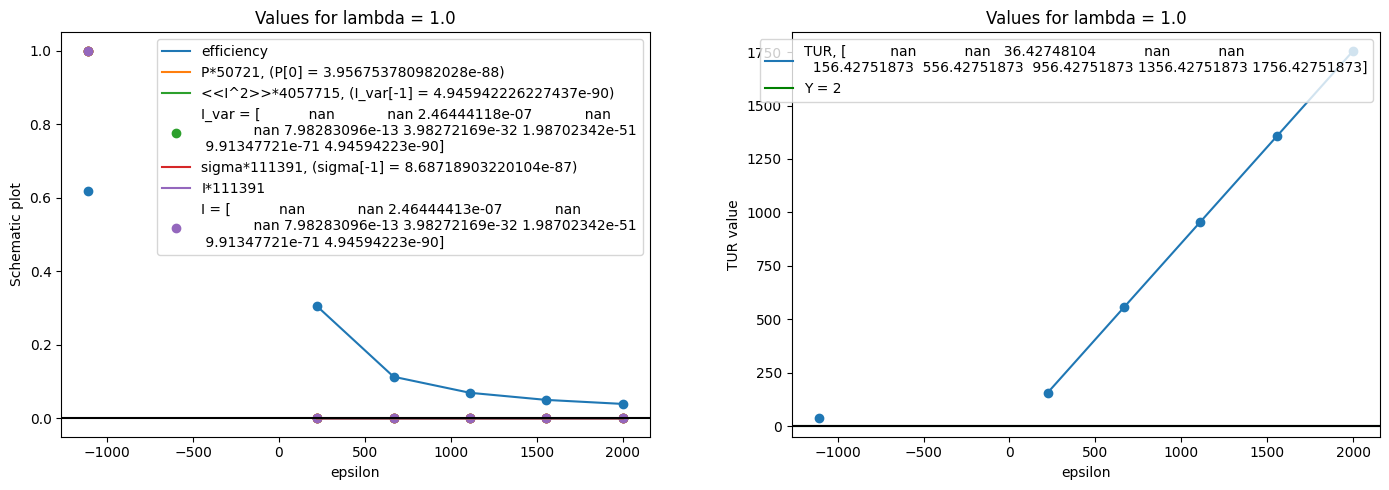

In [21]:
#---------plotting----------------------------------
for idx, lmda in enumerate(lamdas):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) 

    def get_mult(matrix):
        max = 0
        for e_idx, _ in enumerate(epsilons):
            if matrix[idx, e_idx] > max:
                max = matrix[idx, e_idx]
        return 1/max 


    ax1.plot(epsilons, eff[idx], label='efficiency')
    ax1.scatter(epsilons, eff[idx])
    ax1.plot(epsilons, 0.1*get_mult(P)*P[idx], label=f'P*{round(get_mult(P))}, (P[0] = {P[idx][-1]})')
    ax1.scatter(epsilons, get_mult(P)*P[idx])
    ax1.plot(epsilons, 0.4*get_mult(I_var)*I_var[idx], label=f'<<I^2>>*{round(get_mult(I_var))}, (I_var[-1] = {I_var[idx][-1]})')
    ax1.scatter(epsilons, get_mult(I_var)*I_var[idx], label=f"I_var = {I_var[idx]}")
    ax1.plot(epsilons, get_mult(sigma)*sigma[idx], label=f'sigma*{round(get_mult(sigma))}, (sigma[-1] = {sigma[idx][-1]})')
    ax1.scatter(epsilons, get_mult(sigma)*sigma[idx])
    ax1.plot(epsilons, get_mult(I)*I[idx], label=f'I*{round(get_mult(sigma))}')
    ax1.scatter(epsilons, get_mult(I)*I[idx], label=f"I = {I[idx]}")
    print('J_QH[0]:',J_QH[0])
    
    #ax1.scatter(epsilons, J_QH[idx], label=f'J_QH, 0: {J_QH[idx][0]}, 1: {J_QH[idx][1]}, 2: {J_QH[idx][2]} , 3: {J_QH[idx][3]}, 4: {J_QH[idx][4]}, 5: {J_QH[idx][5]}, 6: {J_QH[idx][6]}')
    ax1.axhline(y=0, color='black', linestyle='-')
    #ax1.set_ylim(-0.01, 0.01)
    ax1.set_xlabel('epsilon')
    ax1.set_ylabel('Schematic plot')
    ax1.set_title(f'Values for lambda = {lmda}')
    ax1.legend()

    ax2.plot(epsilons, TUR[idx], label=f'TUR, {TUR[idx]}')
    ax2.scatter(epsilons, TUR[idx])
    ax2.set_title(f'Values for lambda = {lmda}')
    ax2.axhline(y=2, color='g', linestyle='-', label= 'Y = 2')
    ax2.axhline(y=0, color='black', linestyle='-')
    ax2.set_xlabel('epsilon')
    ax2.set_ylabel('TUR value')
    ax2.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

I: (12, 10)
meshgrid:
epsilon: (12, 10)
lamda: (12, 10)


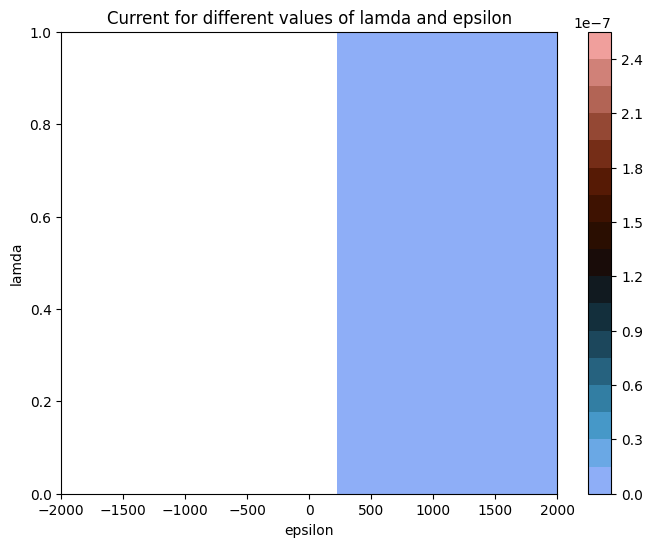

In [11]:
# Plotting of the cummulants

# Create a mesh grid
epsilon, lamda = np.meshgrid(epsilons, lamdas)
print('I:',I.shape)
print('meshgrid:')
print('epsilon:', epsilon.shape)
print('lamda:', lamda.shape)

plt.figure(figsize=(8, 6))
# Create a contour plot (or a pcolormesh plot for a smooth color gradient)
contour = plt.contourf(epsilon, lamda, I, 20, cmap='berlin')  # Adjust number of contour levels as needed
#contour = plt.pcolormesh(epsilon, lamda, I, shading='auto', cmap='viridis')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('lamda')
plt.title('Current for different values of lamda and epsilon')
plt.show()